## Correlation

## Offline Plotly Usage

## Choropleth Maps

# Correlation  http://benalexkeen.com/correlation-in-python/

Correlation values range between -1 and 1.
There are two key components of a correlation value:
magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

## Positive Correlation

Let’s take a look at a positive correlation. Numpy implements a corrcoef() function that returns a matrix of correlations of x with x, x with y, y with x and y with y. We’re interested in the values of correlation of x with y (so position (1, 0) or (0, 1)).

In [93]:
import numpy as np
import pandas as pd
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 100, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)
np.corrcoef(x, y)

array([[ 1.        ,  0.94286018],
       [ 0.94286018,  1.        ]])

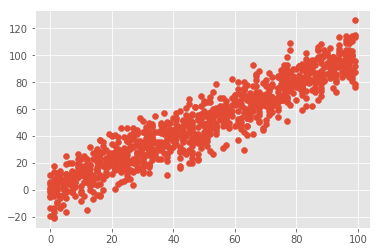

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()

## Negative Correlation

What happens to our correlation figure if we invert the correlation such that an increase in x results in a decrease in y?

[[ 1.         -0.94667084]
 [-0.94667084  1.        ]]


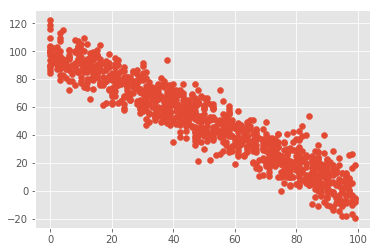

In [94]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 100, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 10, 1000)
# corrcoef output
print(np.corrcoef(x, y)) 
plt.scatter(x, y)
plt.show()

Get imports and set everything up to be working offline.

In [95]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Now set up everything so that the figures show up in the notebook:

In [96]:
# To initialize the notebook mode working offline
init_notebook_mode(connected=True) 

More info on other options for Offline Plotly usage can be found [here](https://plot.ly/python/offline/).

# https://plot.ly/python/

*Plotly's* Python graphing library makes **interactive**, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

## Simple Scatter Plot

In [97]:
# Seeding the numbers for repetition useage
np.random.seed(1)
N = 2000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)
# writing the trace in data; when expotrted to plotly.ly, data is shown 
data = [trace]

# Plot and embed in ipython notebook!
iplot(data)

# or plot with: plot_url = py.plot(data, filename='basic-line')

# Line and Scatter Plots

In [98]:
# Calling plotly and graph objects to wor offline
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Creating traces
# only markers
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
# Markers + Lines
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
# Only Lines
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)
# creating data on traces
data = [trace0, trace1, trace2]
# plotly plot
iplot(data)

# Style Scatter Plots

In [99]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

N = 500

trace0 = go.Scatter(
    x = np.random.randn(N),
    y = np.random.randn(N)+5,
    name = 'Above',
    mode = 'markers',
    # creating marks in coordinate space 
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = np.random.randn(N),
    y = np.random.randn(N)-5,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)
# creating data from trace
data = [trace0, trace1]

layout = dict(title = 'Styled Scatter',
              yaxis = dict(zeroline = True),
              xaxis = dict(zeroline = True)
             )

fig = dict(data=data, layout=layout)
iplot(fig)

In [100]:
trace1=go.Scatter(x=[1,5],y=[5,1])
trace2=go.Scatter(x=[5,1],y=[5,1])
iplot([trace1,trace2])

# Scatter with a Color Dimension

In [101]:
import numpy as np

trace1 = go.Scatter(
    y = np.random.randn(1000),
    mode='markers',
# creating a dictionary for marker
    marker=dict(
        size='10',
        color = np.random.randn(1000), #set color equal to a variable
        colorscale='Coolwarm',
        showscale=True
    )
)
# creating data from trace
data = [trace1]

iplot(data)

# Simple Annotation

## https://plot.ly/python/text-and-annotations/

In [111]:
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    y=[0, 1, 3, 2, 4, 3, 4, 6, 5, 8, 9]
)
trace2 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    y=[0, 4, 5, 1, 2, 2, 3, 4, 2, 6, 5]
)
data = [trace1, trace2]
layout = go.Layout(
    showlegend=True,
    annotations=[
        dict(
            x=6,
            y=4,
            xref='x',
            yref='y',
            text='dict Text',
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=-50
        )
    ]
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
# needs an account to execute 
#plot_url = py.plot(fig, filename='simple-annotation')

# Multiple Annotations

In [127]:
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 3, 2, 4, 3, 4, 6, 5]
)
trace2 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 4, 5, 1, 2, 2, 3, 4, 2]
)

data = [trace1, trace2]

layout = go.Layout(
    showlegend=True,
    annotations=[
        dict(
            x=2,
            y=5,
            xref='x',
            yref='y',
            text='dict Text',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=4,
            y=4,
            xref='x',
            yref='y',
            text='dict Text 2',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=7,
            y=5,
            xref='x',
            yref='y',
            text='dict Text 2',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
    
    
#plot_url = py.plot(fig, filename='multiple-annotation')

## Choropleth US Maps

Plotly's mapping can be a bit hard to get used to at first, remember to reference the cheat sheet in the data visualization folder, or [find it online here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf).

## https://plot.ly/python/choropleth-maps/

In [113]:
import pandas as pd

Now we need to begin to build our data dictionary. Easiest way to do this is to use the **dict()** function of the general form:

* type = 'choropleth',
* locations = list of states
* locationmode = 'USA-states'
* colorscale= 

Either a predefined string:

    'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

or create a [custom colorscale](https://plot.ly/python/heatmap-and-contour-colorscales/)

* text= list or array of text to display per point
* z= array of values on z axis (color of state)
* colorbar = {'title':'Colorbar Title'})

Here is a simple example:

In [114]:
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['text1','text2','text3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Colorbar Title'})

Then we create the layout nested dictionary:

In [115]:
layout = dict(geo = {'scope':'usa'}) # builtin function

Then we use: 

    go.Figure(data = [data],layout = layout)
    
to set up the object that finally gets passed into iplot()

In [116]:
choromap = go.Figure(data = [data],layout = layout)

In [37]:
iplot(choromap)

### Real Data US Map Choropleth

Now let's show an example with some real data as well as some other options we can add to the dictionaries in data and layout.

In [128]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


Now out data dictionary with some extra marker and colorbar arguments:

In [129]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

And our layout dictionary with some more arguments:

In [130]:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [131]:
choromap = go.Figure(data = [data],layout = layout)

In [132]:
iplot(choromap)

# World Choropleth Map

Now let's see an example with a World Map:

In [133]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [134]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [135]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

In [136]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# Python Exploratory Data Analysis Tutorial 
Follow the instructions from the link to complete an Exploratory Data Analysis
https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python


In [137]:
# Import the `pandas` library as `pd`
import pandas as pd

# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra",
                     header=None)

# Print out `digits`
print(digits)

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0

In [52]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [53]:
digits.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6
3822,0,0,2,15,16,13,1,0,0,0,...,0,0,0,4,14,1,0,0,0,7


In [54]:
digits.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000
